In [32]:
import ast
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [27]:
# Load the trained model
model = load_model("vehicle_color_model_detection.h5")

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image with a target size that matches the model's expected input size
    image = load_img(image_path, target_size=(150, 150))  
    # Convert the image to an array
    image = img_to_array(image)
    # Reshape the image to add a batch dimension
    image = np.expand_dims(image, axis=0)
    # Normalize the image
    image = image / 255.0
    return image

# Function to predict color
def predict_color(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    # Make prediction
    predictions = model.predict(image)
    # Decode the prediction
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

In [35]:
# image path for the image 
image_path = "car2.jpeg"
predicted_color = predict_color(image_path)
# Corresponding labels
with open('labels.txt', 'r') as f:
    result = f.read()
output = ast.literal_eval(result)
print(f"predicted Car Color: {output.get(predicted_color[0])}")

1/1 [==============================] - 0s 65ms/step
predicted Car Color: white


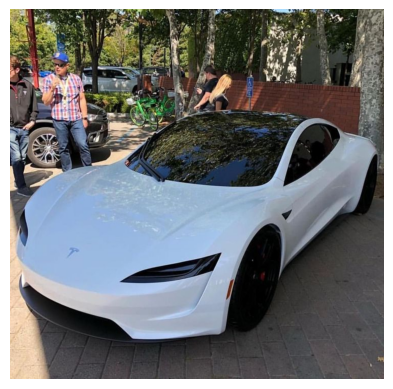

In [36]:
# Target Image for validation
car_image = Image.open(image_path)
plt.axis("off")
plt.imshow(car_image)
plt.show()